# **Project  - Yes bank stock closing price prediction**
**NAME** : Shalini Kush

# **Project Summary -**

 Yes Bank, established in 2004, is a banking institution that provides a diverse range of products and services to both corporate and retail clients, including retail banking and asset management. As a publicly listed company, it offers individuals the opportunity to invest and become shareholders. However, this also means that the company’s valuation is significantly influenced by market sentiment, as stock prices are often driven by investor perception and speculation.

For our analysis, we utilized a dataset containing historical stock prices of Yes Bank. The dataset includes five key features that are useful for predicting the closing price of the stock using machine learning techniques. We developed several regression models and applied some of the most effective algorithms to achieve accurate price predictions.

# Problem Statement

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.


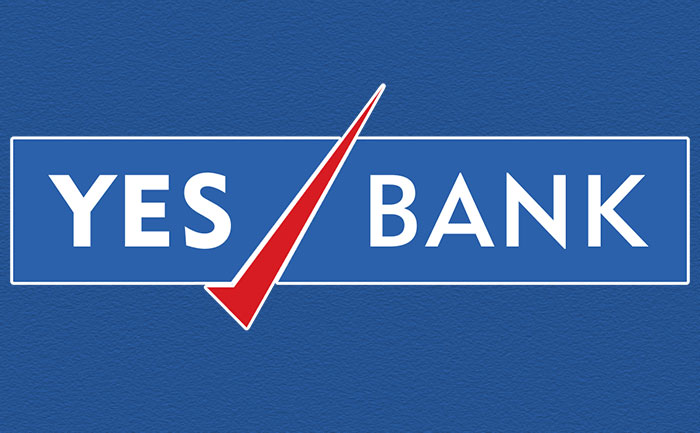



**Project Type - Linear Regression**






# importing libraries

In [1]:
 # Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Core Python libraries
import math
from datetime import datetime

# Preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Model selection and training
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation metrics
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_percentage_error,
    mean_absolute_error
)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


# Load the Data

In [2]:
df = pd.read_csv("data_YesBank_StockPrices.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# Description of Data

In [4]:
len(df)

185

In [5]:
df.shape

(185, 5)

In [6]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
df['Date'] =pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [9]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


# EDA

## **Univariate Analysis**

In [10]:
col = list(df.columns)

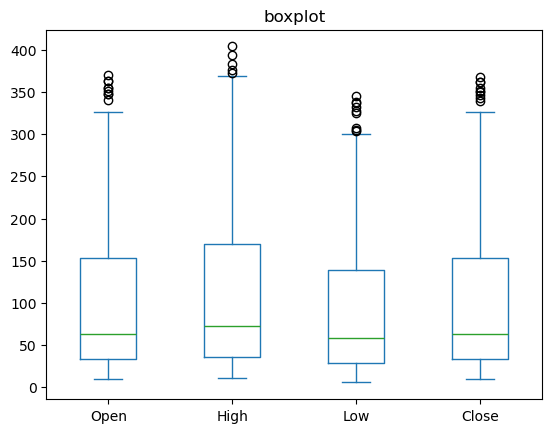

In [11]:




ax = df[col].plot(kind='box', title='boxplot')

plt.show()





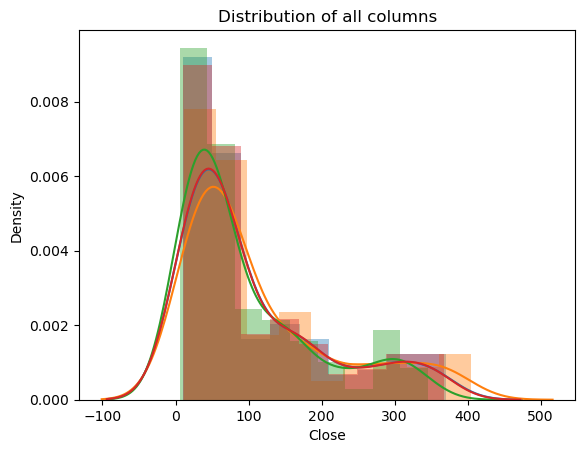

In [12]:
sns.distplot(df['Open'],kde=True)
sns.distplot(df['High'],kde=True)
sns.distplot(df['Low'],kde=True)
sns.distplot(df['Close'],kde=True)
plt.title("Distribution of all columns")
plt.show()



## **Bivariate** **Analysis**

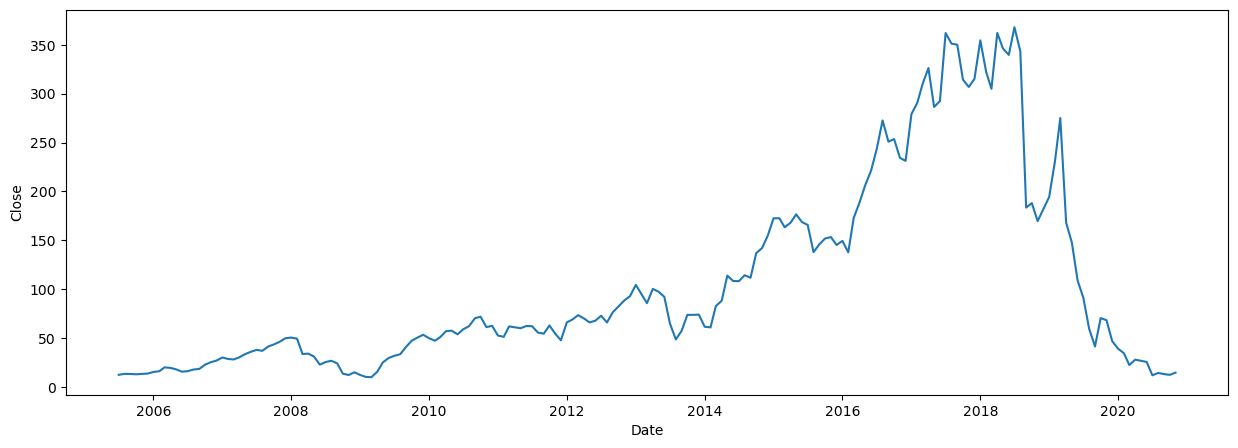

In [13]:

plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Close',data=df)
plt.show()

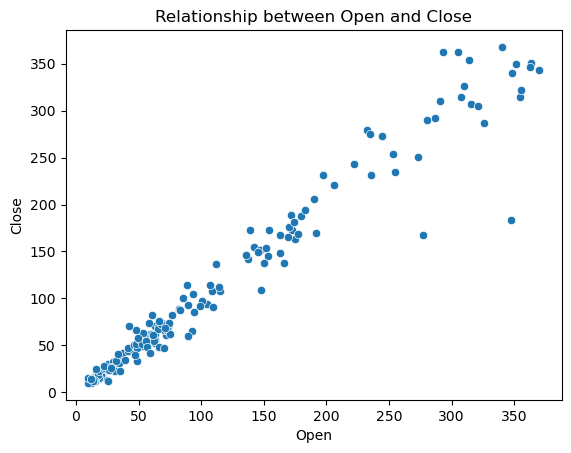

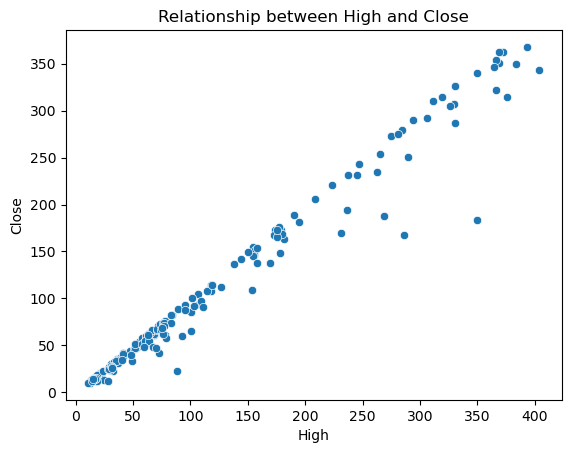

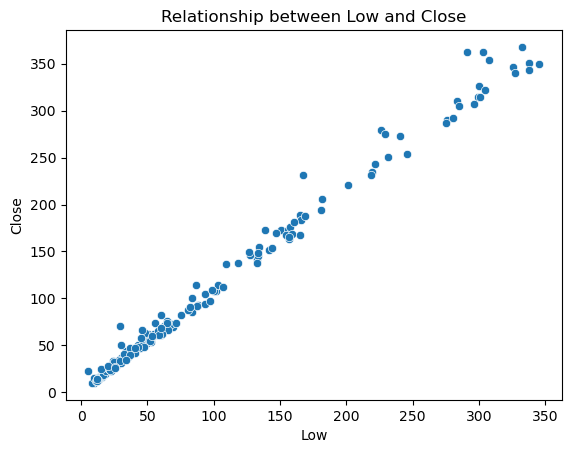

In [14]:
for i in df.columns[1:-1]:
  plt.title(f'Relationship between {i} and Close')
  sns.scatterplot(x=i,y='Close',data=df)
  plt.show()

In [15]:
df.set_index('Date',inplace=True)

In [16]:

!pip install mplfinance

import mplfinance as mpf

df_candle = df[['Open', 'High', 'Low', 'Close']]



Defaulting to user installation because normal site-packages is not writeable


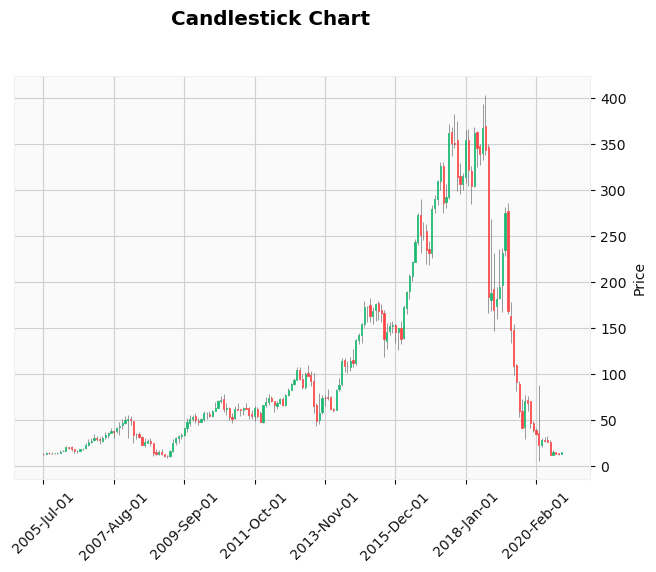

In [17]:

mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')

## **Multivariate Analysis**

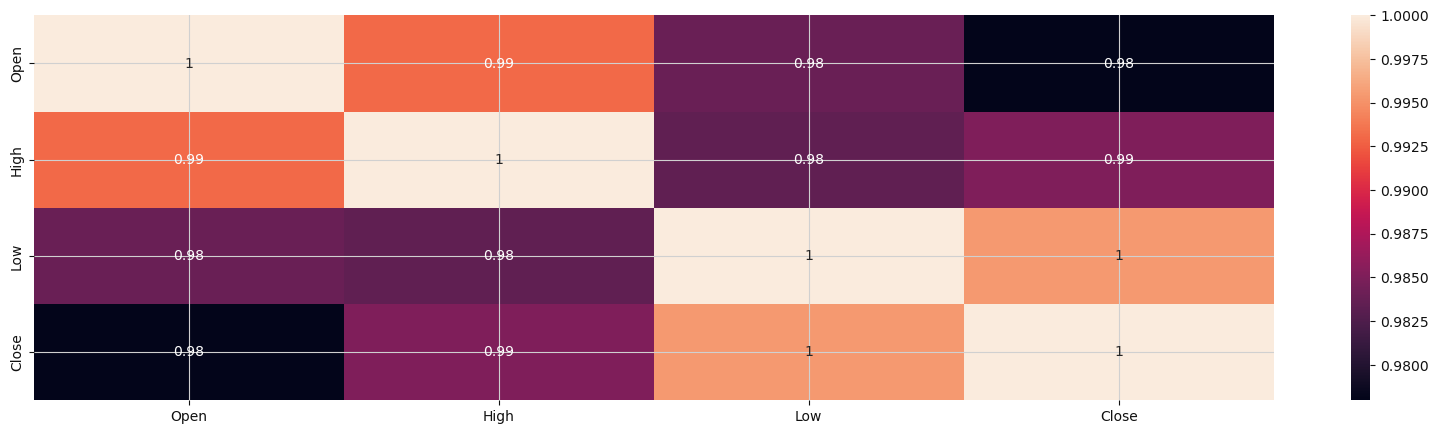

In [18]:
plt.figure(figsize=(20,5))
cor = sns.heatmap(df.corr(),annot=True)

Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

we will try to reducing multicollinearity using transformation of variables

In [19]:
pw = PowerTransformer(method='box-cox',standardize=True)

In [20]:
cf= df[list(df.columns)]

In [21]:
df['Close']

Date
2005-07-01    12.46
2005-08-01    13.42
2005-09-01    13.30
2005-10-01    12.99
2005-11-01    13.41
              ...  
2020-07-01    11.95
2020-08-01    14.37
2020-09-01    13.15
2020-10-01    12.42
2020-11-01    14.67
Name: Close, Length: 185, dtype: float64

In [22]:
kf = pd.DataFrame(pw.fit_transform(cf))

In [23]:
kf.head()

,0,1,2,3
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [24]:
kf.rename(columns={0:'Open',1:'High',2:'Low',3:'Close'},inplace=True)

<Axes: >

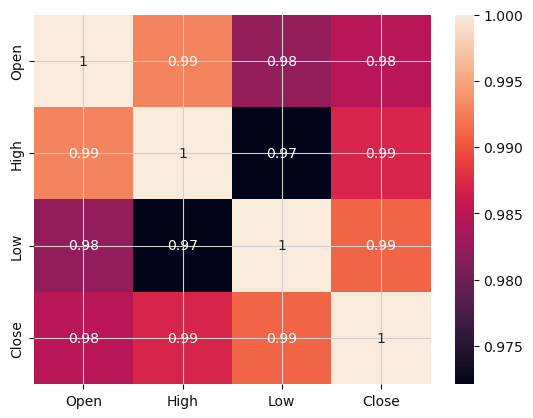

In [25]:
sns.heatmap(kf.corr(),annot=True)

In [26]:
col = list(kf.columns)

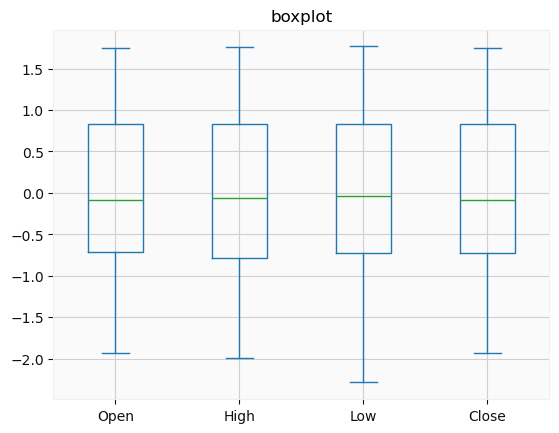

In [27]:
ax = kf[col].plot(kind='box', title='boxplot')

plt.show()

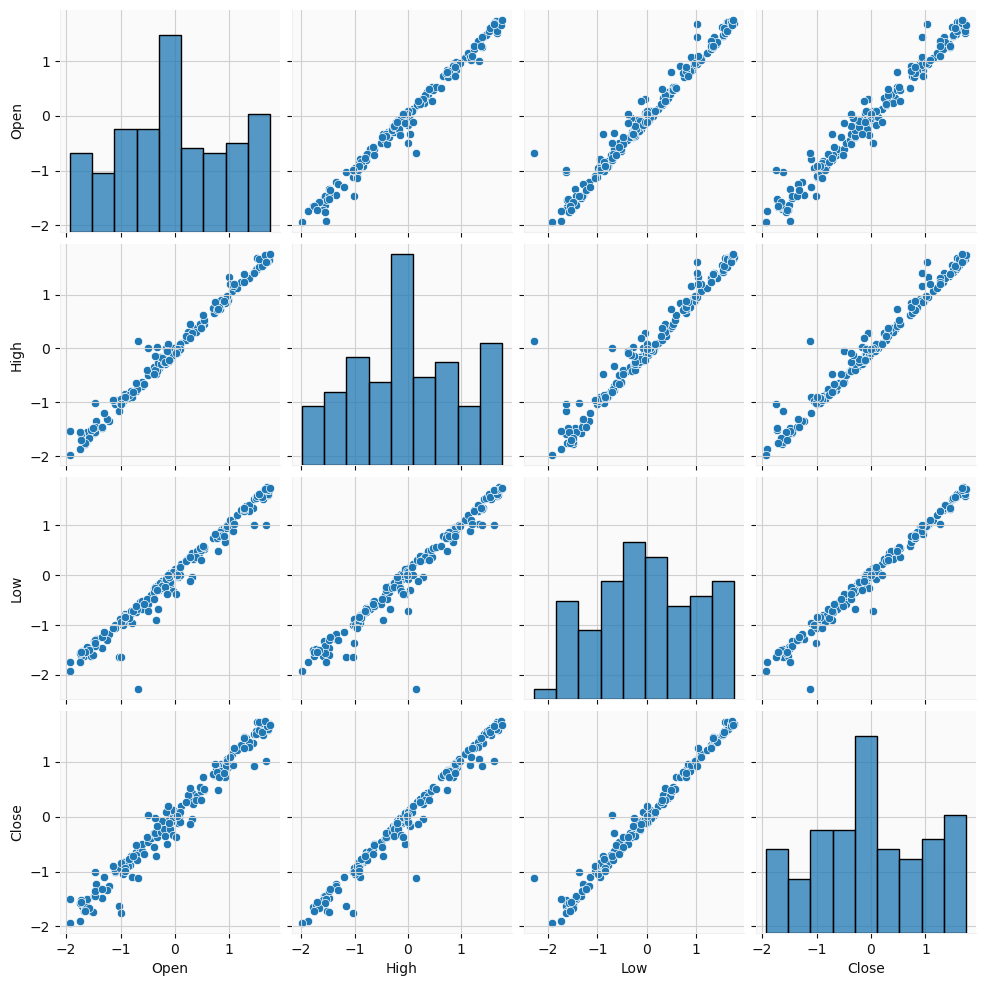

In [28]:
sns.pairplot(kf)

# Data Preprocessing

In [29]:
kf.head()

,Open,High,Low,Close
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [30]:
dependent_variable = 'Close'
independent_variable = list(set(kf.columns.tolist())-{dependent_variable})

In [31]:
x=df[independent_variable].values

In [32]:
y=df[dependent_variable].values

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Linear Regression

In [34]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred = reg.predict(x_test)

In [36]:
linear_r2 = r2_score(y_pred,y_test)

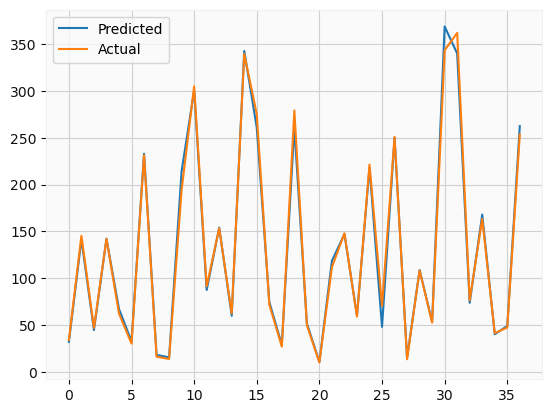

In [37]:
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# KNN

In [38]:
knn = KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
model = GridSearchCV(knn,params,cv=5)

In [39]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [40]:
model.best_params_

{'n_neighbors': 2}

In [41]:
knn = KNeighborsRegressor(n_neighbors=2)

In [42]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [43]:
knn_pred = knn.predict(x_test)

In [44]:
r2_knn = r2_score(y_test,knn_pred)

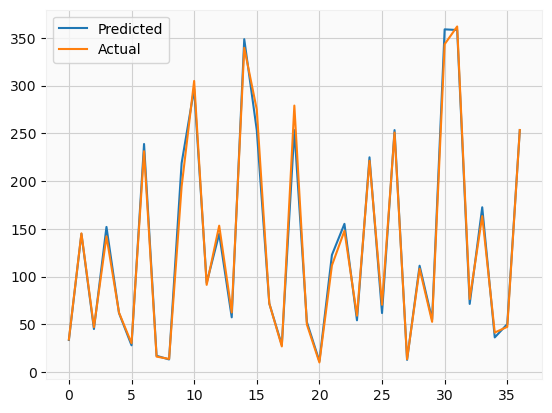

In [45]:
plt.plot(knn_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# RandomForest

In [46]:
rf = RandomForestRegressor()
params = {'n_estimators':[100,200,300],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_features':['sqrt', 'log2', None]}
rf_model = GridSearchCV(rf,params,cv=5)

In [47]:
rf_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [48]:
rf_model.best_params_

{'criterion': 'squared_error', 'max_features': None, 'n_estimators': 100}

In [49]:
rf = RandomForestRegressor(criterion= 'friedman_mse', max_features= None, n_estimators= 300)

In [50]:
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_features=None,
                      n_estimators=300)

In [51]:
rf_predict_ = rf.predict(x_test)

In [52]:
rf_r2 = r2_score(y_test,rf_predict_)

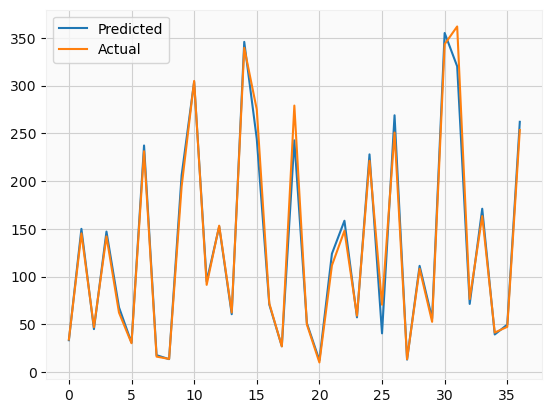

In [53]:
plt.plot(rf_predict_)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# Ridge Regression

In [54]:
ridge =Ridge()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)
ridge_regressor.best_params_


{'alpha': 100}

In [55]:
ridge =Ridge(alpha= 100)

In [56]:
ridge.fit(x_train,y_train)

Ridge(alpha=100)

In [57]:
y_pred_ridge = ridge.predict(x_test)

In [58]:
ridge_r2 = r2_score(y_test,y_pred_ridge)

In [59]:
ridge_r2

0.9930447012730746

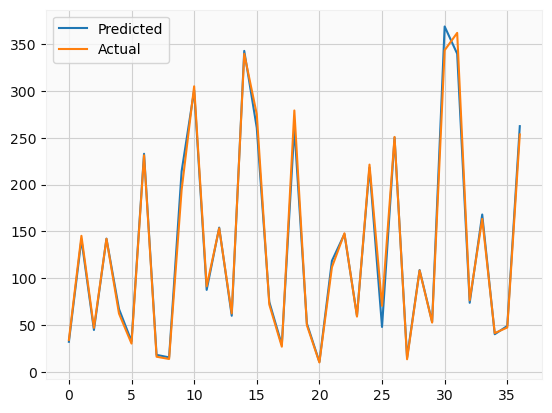

In [60]:
plt.plot(y_pred_ridge)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#Lasso

In [61]:
lasso =Lasso()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [62]:
lasso_regressor.best_params_

{'alpha': 1.6}

In [63]:
lasso =Lasso(alpha= 1.6)

In [64]:
lasso.fit(x_train,y_train)

Lasso(alpha=1.6)

In [65]:
lasso_predict = lasso.predict(x_test)

In [66]:
lasso_r2 = r2_score(lasso_predict,y_test)

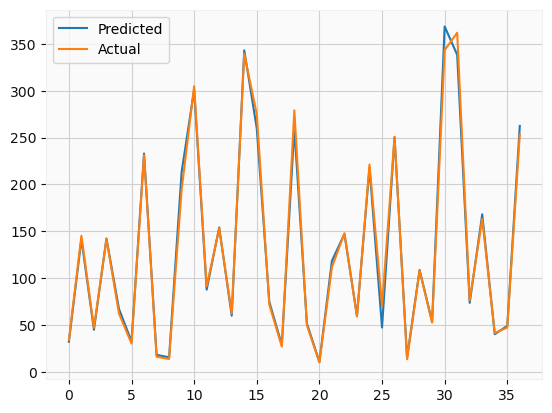

In [67]:
plt.plot(lasso_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#Elasticnet

In [68]:
elastic =ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, param, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [69]:
elastic_regressor.best_params_

{'alpha': 5, 'l1_ratio': 0.1}

In [70]:
elastic =ElasticNet(alpha = 5, l1_ratio = 0.1)

In [71]:
elastic.fit(x_train,y_train)

ElasticNet(alpha=5, l1_ratio=0.1)

In [72]:
elastic_predict = elastic.predict(x_test)

In [73]:
elastic_r2 = r2_score(elastic_predict,y_test)

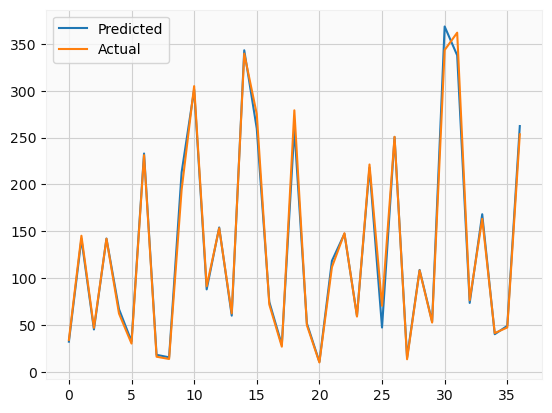

In [74]:
plt.plot(elastic_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# Evaluation Summary

In [75]:
Report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression','knn regression','RandomForest Regression'],'r2_score':[linear_r2,ridge_r2,lasso_r2,elastic_r2,r2_knn,rf_r2]})


In [76]:
Report.sort_values(by=['r2_score'],ascending=False,inplace=True)

In [77]:
Report

,model,r2_score
4,knn regression,0.993115
0,linear regression,0.993056
1,ridge regression,0.993045
2,lasso regression,0.992787
3,elastic net regression,0.992702
5,RandomForest Regression,0.985105


# **Conclusions Drawn :**
---
• After visualizing the target variable, it becomes evident that the stock price experienced a sharp decline during the 2018 fraud case involving Rana Kapoor, highlighting its significant impact on investor sentiment.

• Upon loading and inspecting the dataset, we confirmed that it contains no missing or duplicate entries. While there are some outliers present in the features, removing them would result in the loss of valuable data due to the dataset’s small size.

• All variables in the dataset display a positive skew in their distribution. To address this, we applied a power transformation to normalize the data and improve model performance.

• We observed a strong correlation between the independent variables and the target (Close), suggesting that the closing stock price can be reliably predicted based on the available features. Although high intercorrelation among independent variables indicates multicollinearity, it is difficult to eliminate in this case due to the limited dataset.

• To predict the closing price, we experimented with multiple machine learning models. Among them, the K-Nearest Neighbors (KNN) regressor delivered the most accurate results, achieving an impressive R² score of 0.993115 and performing exceptionally across all evaluation metrics.
